# Heat Capacity Tutorial

### In this simple Jupyter Notebook we will give you some introduction to python and the Ipython environment.


Welcome to Jupyter Notebook, this is an interactive environment where you run cells as lines of code and get your output afterwards in a nice ordered way.  

In order to run a cell you need to click on it and press {shift [⇧] + ENTER [↵]}. on the left side of the cell a symbol In [ * ] will appear. This means the kernel is thinking. Like if a small mouse in your computer was figuring out what you want. Once it is finished, your computer will show you the output you asked it for and [ * ]. will turn into a number [1] which means that is the first thing you asked it to do in this session. I know this is a lot of text and you want to get hands on, so just click on the next cell and press {shift [⇧] + ENTER [↵]}, the mouse inside your PC will salute you!

In [1]:
print('Hello! :D')

Hello! :D


See? It's neither magic nor a mouse, Python is the programming language behind this and we use functions to tell the computer what we want.

Python works with variables that you assign something to, like functions, lists, arrays, dictionaries, etc.

Usually a list looks like a shopping list [eggs, milk,fruit,mouse food] , an array looks like a matrix with dimensions like (number of samples, number of outputs) and usually stores big chunks of data inside. In the following cell you have an example.

In [2]:
# We assign values to the shopping list:
shopping_list = ['eggs', 'milk','fruit','mouse_food']

# We assign some random  numbers to an array:
values = [[1,2,3],[4,5,6]]

print('This is a list =', shopping_list)
print()
print('This is an array = ', values)

This is a list = ['eggs', 'milk', 'fruit', 'mouse_food']

This is an array =  [[1, 2, 3], [4, 5, 6]]


### Now we are going to load some energy data for a system and calculate the heat capacity

After the brief introduction, in order to calculate the heat capacities we need to use some modules for python, Numpy (Numerical Python) for numerical operations and matplotlib to plot values. 

Modules are chunks of code that other people have written that we can load to do stuff.

###### We load them by specifying him to import them:

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm

Let's imagine we have finished 3 simulations of the same system at three different temperatures and we succesfully calculated the energy with NAMD. 

#### We have been asked to calculate the heat capacity of the systems.

Our first step should be loading the data into our session, in this case we have 3 files in the same folder, called after their temperature value. 

###### We can easily load them by using the command np.loadtxt():

In [4]:
# We load them using the np.loadtxt() function 
# and specifying the path of the files with a string ('PATH_TO_FILE'):

sim1 = np.loadtxt('280K.dat')

sim2 = np.loadtxt('298K.dat')

sim3 = np.loadtxt('320K.dat')

###### This way we have loaded the 3 files and assigned them to 3 variables. Let's have a check on them. 

In [5]:
# Using print() and the attribute .shape of our variable we can get what our data files look like:

print('Our Simulation data files have this shape (Data-points or steps, Values) =', sim1.shape)

Our Simulation data files have this shape (Data-points or steps, Values) = (12196, 20)


##### This means we have 20 different energy terms to chose from, if we select the 13th column we get total energies for them:

In [6]:
# In this case we extract the 13th column by specifying the index [13] after transposing the data with .T 
# We also cut the first 300 frames [300:] because they are not relevant to us:

sim1_e = sim1[300:].T[13]

sim2_e = sim2[300:].T[13]

sim3_e = sim3[300:].T[13]

Now we are gonna plot the data points that we have for each simulation. But before that we will check the number of data points for each:

In [7]:
# Again, with .shape we can check the size of our variables,
# but to be more fancy we will use len() which shows you the length of a list of values:

print('The first simulation has', len(sim1_e),'data points.' )
print('The second simulation has', len(sim2_e),'data points.')
print('The third simulation has', len(sim3_e),'data points.' )



The first simulation has 11896 data points.
The second simulation has 1139 data points.
The third simulation has 11995 data points.


Now that we know the number of data points, let's try to plot it to see what they look-like exactly:

###### We will use matplotlib in order to do that:

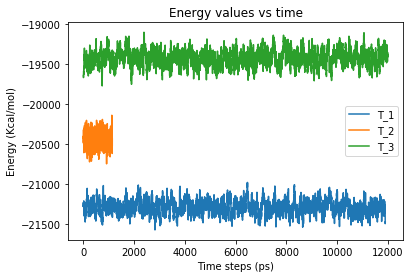

In [8]:
#Let's plot the values for each one:
plt.figure()
plt.plot(sim1_e, label='T_1')
plt.plot(sim2_e, label='T_2')
plt.plot(sim3_e, label='T_3')
plt.xlabel('Time steps (ps)')
plt.ylabel('Energy (Kcal/mol)')
plt.title('Energy values vs time')
plt.legend();

This is the resulting plot showing the energies vs time, as you see the T_2 is a shorter one, but they clearly have 3 different values of energy, and it makes sense because they were run at 3 different temperatures.

Now we are going to plot the Probability Density Function (PDF) of the total energy for each simulation and do a simple fit to check the distribution landscape. 

The PDF tells us how likely each value of energy is (based on the simulation data we loaded).
###### To do this we use norm.fit() and the matplotlib module again to plot them:

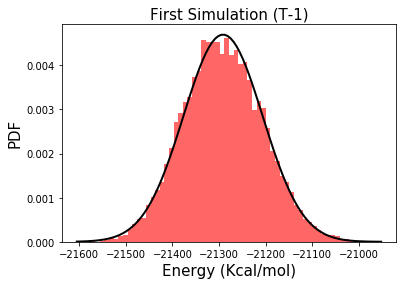

Fit results: <E> = -21291.37,  σ = 84.96




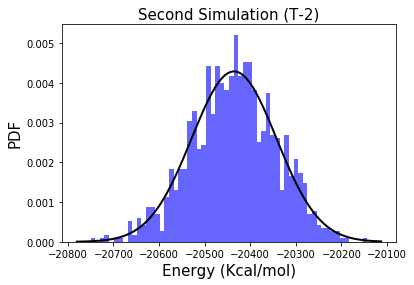

Fit results: <E> = -20435.49,  σ = 93.01




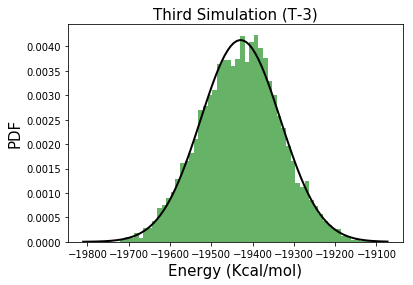

Fit results: <E> = -19429.08,  σ = 96.59




In [9]:
#Fit the distributions for each one:
mu_1, std_1 = norm.fit(sim1_e)
mu_2, std_2 = norm.fit(sim2_e)
mu_3, std_3 = norm.fit(sim3_e)

#Define the number of bins to use:
bins = 60

#Plot the Histograms:

#####First One####

plt.figure()
plt.hist(sim1_e, bins=bins, density=True, alpha=0.6, color='r')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_1, std_1)
plt.plot(x, p, 'k', linewidth=2)
plt.title("First Simulation (T-1)", fontsize=15)
plt.xlabel("Energy (Kcal/mol)", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.show()
print("Fit results: <E> = %.2f,  σ = %.2f" % (mu_1, std_1))
print()
print()

#####Second One####

plt.figure()
plt.hist(sim2_e, bins=bins, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_2, std_2)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Second Simulation (T-2)", fontsize=15)
plt.xlabel("Energy (Kcal/mol)", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.show()
print("Fit results: <E> = %.2f,  σ = %.2f" % (mu_2, std_2))
print()
print()

#####Third One####

plt.figure()
plt.hist(sim3_e, bins=bins, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_3, std_3)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Third Simulation (T-3)", fontsize=15)
plt.xlabel("Energy (Kcal/mol)", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.show()
print("Fit results: <E> = %.2f,  σ = %.2f" % (mu_3, std_3));
print()
print()


This is what the histograms look like, and as expected, the average energy $\langle E \rangle$ gets smaller as the temperature decreases. Also their standard deviations (σ) are similar. Now if we plot the average energy $\langle E \rangle$ against the temperature we get a linear fit with a certain slope. 

In [ ]:

T = [280,298,320]

mu = [mu_1,mu_2,mu_3]
std = [std_1,std_2,std_3]

plt.figure()
plt.plot(T,mu, '-o')
plt.title('Mean energy <E> vs temperature T', fontsize=15)
plt.ylabel('<Energy>', fontsize=15)
plt.xlabel('Temperature',fontsize=15)
plt.show()


To calculate the Heat Capacity $C_v$, we do a polynomial fit of the values for the $\langle E \rangle$ vs T.

Since we are plotting $\langle E \rangle$ vs T, the slope of the fitting line is $\frac{d \langle E \rangle}{dt}$. 

So the slope of the line will give us our heat capacity since $C_v=\frac{d \langle E \rangle}{dt}$

###### We do the polynomial fit:

In [ ]:

poly_coeficients = np.polyfit(T,mu,1)

print('The polynomial fit has this terms (y = ax +b):','y =',poly_coeficients[0],'X','+','(',poly_coeficients[1],')')
print()


###### And we show the slope term from the linear fit coeficients:

In [ ]:
cV = poly_coeficients[0]

print('Cv of the linear fit for Energy vs T =',cV)

#### Another way to calculate the heat capacity of our system is from the fluctuations, using the formula $\sigma = kT^2C_v$

In [ ]:
#We plot the standard deviation of our data
plt.figure()
plt.plot(T,std,'-o',color='C1')
plt.title('Standard Deviation (σ) vs temperature', fontsize=15)
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('<Standard deviation (kcal/mol)>', fontsize=15)
plt.show()

In [ ]:
#We define the value of the Boltzmann constant
R = 1.987/1000

print()
print('The Boltzmann constant is R =',R)
print()

#And we calculate the Cv from the fluctuations at three temperatures with the formula 
cV_fluc1 = (std[0]**2)/(R*(T[0]**2))
cV_fluc2 = (std[1]**2)/(R*(T[1]**2))
cV_fluc3 = (std[2]**2)/(R*(T[2]**2))

print('The heat capacity fluctuations for the three temperatures are:')
print()
print('T280 =',cV_fluc1)
print('T298 =',cV_fluc2)
print('T320 =',cV_fluc3)
print()